## Daniela Jiménez Téllez

### A01654798

---

# Momento de Retroalimentación: Módulo 2 Análisis y Reporte sobre el desempeño del modelo.

---

## Importación de librerías

In [108]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("dark_background")

## Importación de datos

In [109]:
semilla = np.random.seed(4798)

In [110]:
df = pd.read_csv("Valhalla23.csv")

In [111]:
df

,Celsius,Valks
0,61.4720,-139.7400
1,70.5790,-156.6000
2,-7.3013,73.2690
3,71.3380,-165.4200
4,43.2360,-75.8350
...,...,...
95,-7.0094,69.6320
96,36.8820,-71.2400
97,26.9390,-34.2550
98,-18.8100,106.4300


### División de datos en 40% entrenamiento, 40% validación y 20% prueba

In [112]:
from sklearn.model_selection import train_test_split

In [113]:
train_val_set, test_set = train_test_split(df, test_size = 0.2, random_state = semilla)

train_set, val_set = train_test_split(train_val_set, test_size = 0.5, random_state = semilla)

### Modelo SGDRegressor

In [114]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

In [115]:
X_train = train_set.drop(columns = ["Valks"])
y_train = train_set["Valks"]

X_val = val_set.drop(columns = ["Valks"])
y_val = val_set["Valks"]

X_test = test_set.drop(columns = ["Valks"])
y_test = test_set["Valks"]

sgd_regressor = SGDRegressor(learning_rate = "constant", eta0 = 1e-4, max_iter = 1000000, random_state = semilla)
sgd_regressor.fit(X_train, y_train)

SGDRegressor(eta0=0.0001, learning_rate='constant', max_iter=1000000)

### Error cuadrático (MSE)

In [156]:
y_train_pred = sgd_regressor.predict(X_train)
y_val_pred = sgd_regressor.predict(X_val)
y_test_pred = sgd_regressor.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_val = mean_squared_error(y_val, y_val_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f"MSE en el conjunto de entrenamiento es: {mse_train:.4f}")
print(f"MSE en el conjunto de validación es: {mse_val:.4f}")
print(f"MSE en el conjunto de prueba es: {mse_test:.4f}")

MSE en el conjunto de entrenamiento es: 1241.7502
MSE en el conjunto de validación es: 1188.9022
MSE en el conjunto de prueba es: 820.8457


### Gráfica de los subconjuntos de datos vs. las predicciones

In [117]:
X_combined = np.concatenate([X_train, X_val, X_test])
X_range = np.linspace(X_combined.min(), X_combined.max(), 100).reshape(-1, 1)
X_range = pd.DataFrame(X_combined, columns = [X_train.columns[0]])

y_model = sgd_regressor.predict(X_range)

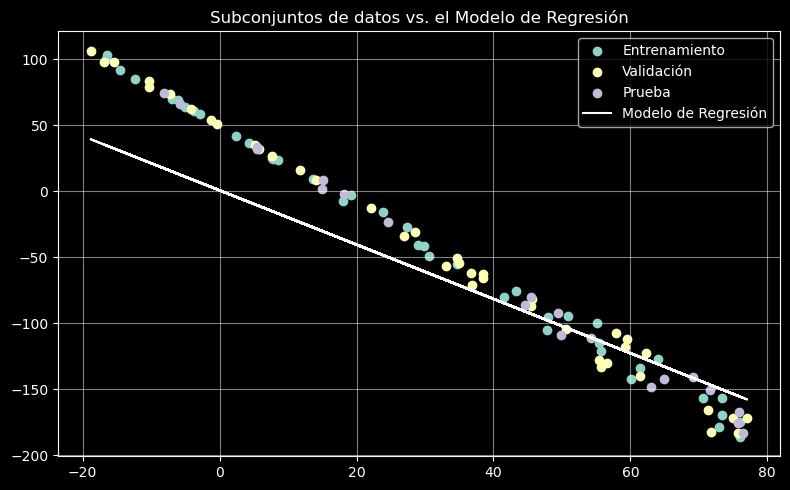

In [138]:
plt.figure(figsize = (8, 5))

plt.scatter(X_train, y_train, label = "Entrenamiento")
plt.scatter(X_val, y_val, label = "Validación")
plt.scatter(X_test, y_test, label = "Prueba")

plt.plot(X_range, y_model, color = "white", label = "Modelo de Regresión")

plt.title("Subconjuntos de datos vs. el Modelo de Regresión")

plt.legend()
plt.grid(True, alpha = 0.5)
plt.tight_layout()

plt.show()

### Modelos basados en la lista de 20 elementos, con su MSE y el promedio de este

In [119]:
elementos = random.sample(range(3, 40), 19)
elementos.append(2)
elementos.sort()

elementos

[2, 4, 5, 6, 8, 9, 11, 12, 16, 17, 18, 20, 21, 23, 26, 29, 30, 34, 36, 38]

In [128]:
resultados = []

promedio_mse_train = []
promedio_mse_val = []

for elemento in elementos:

    mse_train_list = []
    mse_val_list = []
    
    for i in range(100):
        
        subset_indices = random.sample(range(X_train.shape[0]), elemento)
        X_subset = X_train.iloc[subset_indices]
        y_subset = y_train.iloc[subset_indices]
        
        model = SGDRegressor(learning_rate = "constant", eta0 = 1e-4, max_iter = 1000000, random_state = semilla)
        model.fit(X_subset, y_subset)
        
        
        y_subset_pred = model.predict(X_subset)
        mse_train = mean_squared_error(y_subset, y_subset_pred)
        mse_train_list.append(mse_train)
        
        y_val_pred = model.predict(X_val)
        mse_val = mean_squared_error(y_val, y_val_pred)
        mse_val_list.append(mse_val)

        mean_mse_train = np.mean(mse_train_list)
        
        mean_mse_val = np.mean(mse_val_list)
        
        resultados.append((elemento, mean_mse_train, mean_mse_val))

    promedio_mse_train.append(np.mean(mse_train_list))
    promedio_mse_val.append(np.mean(mse_val_list))

for elemento, mean_mse_train, mean_mse_val in resultados:
    print(f"Tamaño: {elemento}, MSE Promedio Entrenamiento: {mean_mse_train:.4f}")
    print(f"           MSE Promedio Validación: {mean_mse_val:.4f}")

Tamaño: 2, MSE Promedio Entrenamiento: 4.4497
           MSE Promedio Validación: 1259.0786
Tamaño: 2, MSE Promedio Entrenamiento: 878.9379
           MSE Promedio Validación: 1245.9952
Tamaño: 2, MSE Promedio Entrenamiento: 587.5178
           MSE Promedio Validación: 855.9550
Tamaño: 2, MSE Promedio Entrenamiento: 441.8663
           MSE Promedio Validación: 656.7950
Tamaño: 2, MSE Promedio Entrenamiento: 354.8581
           MSE Promedio Validación: 576.1173
Tamaño: 2, MSE Promedio Entrenamiento: 300.0876
           MSE Promedio Validación: 563.5646
Tamaño: 2, MSE Promedio Entrenamiento: 258.6621
           MSE Promedio Validación: 499.1652
Tamaño: 2, MSE Promedio Entrenamiento: 227.0666
           MSE Promedio Validación: 464.8335
Tamaño: 2, MSE Promedio Entrenamiento: 373.0290
           MSE Promedio Validación: 561.6105
Tamaño: 2, MSE Promedio Entrenamiento: 339.2871
           MSE Promedio Validación: 36253.0803
Tamaño: 2, MSE Promedio Entrenamiento: 310.2117
           MSE Prome

In [129]:
print("Errores promedio en el conjunto de entrenamiento para cada tamaño:")
print(promedio_mse_train)

print("\nErrores promedio en el conjunto de validación para cada tamaño:")
print(promedio_mse_val)

Errores promedio en el conjunto de entrenamiento para cada tamaño:
[101.95500051085455, 115.7719211935262, 187.61533305990707, 258.6803840721587, 621.6408335088204, 807.3697987594812, 997.8575452737775, 1020.7846630344792, 1130.5217663533965, 1126.9129759943983, 1114.3351154964862, 1200.5174586955725, 1179.9020206002053, 1201.5498378797197, 1182.8200365131293, 1163.6972221632614, 1176.9567004898536, 1161.2757086708627, 1149.1400131880532, 1108.0287641644404]

Errores promedio en el conjunto de validación para cada tamaño:
[8902.38367931157, 223.272168027826, 276.1119781545653, 375.07648323000615, 701.1570773998783, 846.1529924656431, 1034.2748534254515, 1093.6019845691565, 1100.921119043349, 1140.2893684909768, 1118.300001666356, 1137.461397415918, 1163.6119251492405, 1147.8691991007538, 1141.3629416297217, 1142.9058531396006, 1137.4345297226723, 1123.8381515770693, 1104.433981725054, 1064.1611902507163]


In [131]:
# Agrega a las listas anteriores los errores de entrenamiento y validación de la línea base

promedio_mse_train.append(mse_train)
promedio_mse_val.append(mse_val)

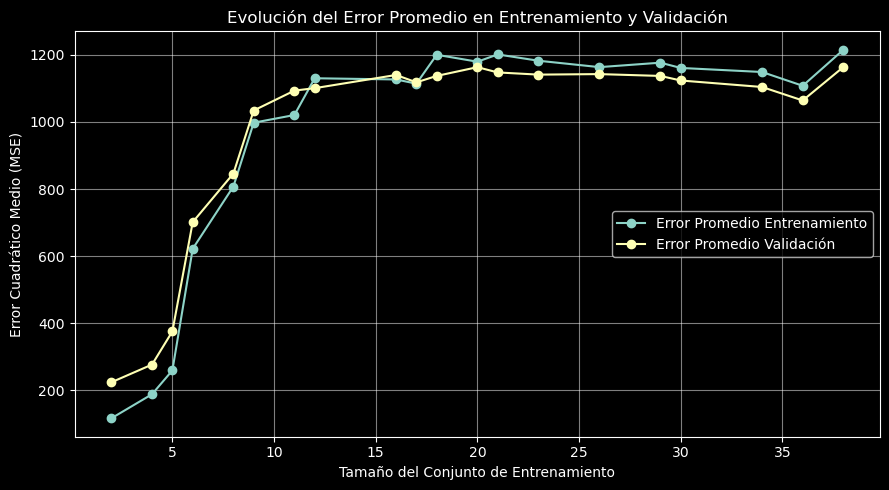

In [153]:
# Gráfica de la evolución del error promedio

tamaños = [len(X_train)] + elementos

plt.figure(figsize = (9, 5))
plt.plot(tamaños[1:], promedio_mse_train[1:], label = "Error Promedio Entrenamiento", marker = "o")
plt.plot(tamaños[1:], promedio_mse_val[1:], label = "Error Promedio Validación", marker = "o")

plt.xlabel("Tamaño del Conjunto de Entrenamiento")
plt.ylabel("Error Cuadrático Medio (MSE)")
plt.title("Evolución del Error Promedio en Entrenamiento y Validación")

plt.legend(loc = "right")
plt.grid(True, alpha = 0.5)
plt.tight_layout()
plt.show()

In [ ]:
# Sesgo y varianza

Con base en la gráfica anterior, 


Igualmente, obvservando la gráfica se puede notar que a partir **20 muestras** el MSE se empieza a estabilizar, lo que nos dice que el modelo empieza a tener un mejor y constante rendimiento. Asimismo, en cuanto a la varianza y el sesgo se puede notar que no hay tanta discrepancia entre ellos, por lo que hay un buen balance.

In [155]:
subset_indices = random.sample(range(X_train.shape[0]), 20)

X_subset = X_train.iloc[subset_indices]
y_subset = y_train.iloc[subset_indices]

model = SGDRegressor(learning_rate = "constant", eta0 = 1e-4, max_iter = 1000000, random_state = semilla)
model.fit(X_subset, y_subset)

y_subset_pred = model.predict(X_subset)
mse_train_subset = mean_squared_error(y_subset, y_subset_pred)

y_val_pred = model.predict(X_val)
mse_val = mean_squared_error(y_val, y_val_pred)

y_test_pred = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f"MSE en el subconjunto de entrenamiento de 20 muestras : {mse_train_subset:.4f}")
print(f"MSE en el conjunto de validación: {mse_val:.4f}")
print(f"MSE en el conjunto de prueba: {mse_test:.4f}")

MSE en el subconjunto de entrenamiento de 20 muestras : 1262.0675
MSE en el conjunto de validación: 1190.6551
MSE en el conjunto de prueba: 841.8895


### COMPARACIÓN DE MODELOS

### ARGUMENTACIÓN DE CUÁL FUNCIONÓ MEJOR